## 1. Матрица Вандермонда (10 баллов)

Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решение задействуйте np.reshape и/или np.newaxis.

In [2]:
import numpy as np

def make_vandermond(ar_list):
    n = len(ar_list)
    a = []
    for i in range(n):
        for el in ar_list:
            a.append(el**i)
    res = np.array(a).reshape(n, n, order='F')
    return res

print(make_vandermond([2, 2, 3, 3, 3, 4, 5]))

[[    1     2     4     8    16    32    64]
 [    1     2     4     8    16    32    64]
 [    1     3     9    27    81   243   729]
 [    1     3     9    27    81   243   729]
 [    1     3     9    27    81   243   729]
 [    1     4    16    64   256  1024  4096]
 [    1     5    25   125   625  3125 15625]]


## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

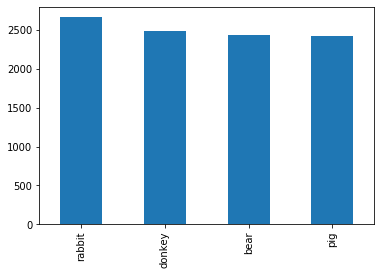

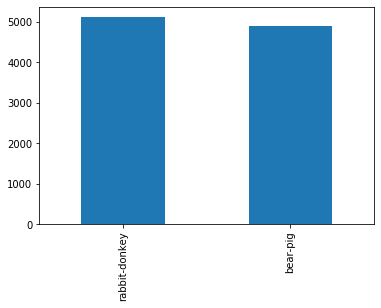

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Входные данные
competitors = 4
hours = 42
marafons = 10**4

# Тестовые данные
# bear = np.array([[1000, 2, 3], [4, 5, 6]])
# pig = np.array([[7, 1200, 9], [10, 11, 12]])
# rabbit = np.array([[13, 14, 15], [16, 200, 18]])
# donkey = np.array([[19, 20, 1300], [22, 23, 1400]])

bear = np.random.exponential(1, (hours, marafons))
pig = np.random.normal(1, 1, (hours, marafons))
rabbit = np.random.poisson(1, (hours, marafons))
donkey = np.random.binomial(1, 0.5, (hours, marafons)) * 2

# Сформируем итоговый массив - номер марафона, участник, пробег
common_table = np.row_stack((bear, pig, rabbit, donkey)).reshape(competitors,hours,marafons)

# Получим суммированные результаты по всем марафонам каждого из участников
results = common_table.sum(axis=1)

# Задание 1
# Создадим дата-фрейм на основании массива, присвоим строкам имена участников
df = pd.DataFrame(results, index=['bear', 'pig', 'rabbit', 'donkey'])
df.idxmax().value_counts().plot(kind='bar')
plt.show()

# Задание 2
# Суммировоанные результаты команды Винни-Пух - Пятачок
team_1 = results[0] + results[1]

# Суммировоанные результаты команды Кролик - Иа
team_2 = results[2] + results[3]

# Создадим дата-фрейм на основании массива, пррисвоим строкам имена команд, нарисуем график
df2 = pd.DataFrame(np.row_stack((team_1, team_2)), index=['bear-pig', 'rabbit-donkey'])
df2.idxmax().value_counts().plot(kind='bar')
plt.show()

## 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# 1. Загрузить файл с данными. 
# Отобразить первые и последние 5 наблюдений. 
# Узнать сколько наблюдений и переменных есть в вашем наборе данных. 
# Какой тип(формат) имеет каждая переменная? 
# Привести переменную Date к формату даты.

# Загружаем данные из файла
df = pd.read_csv('walmart.csv', parse_dates=['Date'])

# Первые и последние 5 наблюдений
print('Первые 5 наблюдений')
print(df.head(5))
print('Последние 5 наблюдений')
print(df.tail(5))

# количество наблюдений и переменных
rows_count = len(df.count(1))
print('Всего наблюдений: ' + str(rows_count))
print('Всего переменных: ' + str(len(df.count(0))))

# Наименование и тип колонок
print('Наименования и типы колонок: ')
print(df.dtypes)

# 2. Разобраться с пропущенными значениями:
# - вывести сколько пропущенных значений в процентах есть в каждой переменной;
# - удалить переменные, которые имеют более 60% пропущенных значений.
for column in df:
    empty_rows = df[column].isna().sum()
    print('Колонка: ' + column + ' пустых значений: ' + str(empty_rows) + ' ('+str(100*empty_rows / rows_count) +' %)')
    if empty_rows / rows_count > 0.6:
        # Удаляем колонку из дата фрейма
        df.drop([column], axis='columns')

# 3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные?
print('Всего магазинов: ' + str(df['Store'].value_counts().count()))
print('Всего отделов: ' + str(df['Dept'].value_counts().count()))
print('Данные за период: '+str(df['Date'].min()) + ' - ' + str(df['Date'].max()))


# 4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
# Получим дата-фрейм с продажами по магазинам, он нам понадобится для решения нескольих задач
plt.title('Динамика продаж сети', fontsize=15)
shops_sales = df.groupby(['Date', 'Store'], as_index=False).agg({'Weekly_Sales': sum})
shops_sales.set_index('Date')['Weekly_Sales'].plot(figsize=(25, 6))
plt.show()

# 5. Найдите и нарисуйте матрицу корреляции для числовых показателей.

# 6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
# Получим дата-фрейм с продажами, сгрупировоанными по магазину и отсортировоанными по убыванию (первые 5)
top_shops = shops_sales.groupby(['Store'], as_index=False).agg({'Weekly_Sales': sum}).sort_values('Weekly_Sales', ascending=False).head(5)

# Путем объединение основного фрейма с продажами (Дата, магазин) с топовыми магазинами получим продажи по ним
plt.title('Динамика продаж магазинов из ТОП-5', fontsize=15)
top_shops_sales = shops_sales.merge(right=top_shops, how='inner', on=['Store'])
for i in top_shops_sales['Store'].value_counts().index:
    sub_frame = top_shops_sales[top_shops_sales['Store'] == i]
    plt.plot(sub_frame.Date, sub_frame.Weekly_Sales_x, label = 'Магазин: '+str(i))
    
plt.legend()     
plt.show()

# 7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них
sales_2011_A = df[(df['Type'] == 'A') & (df['Date'] >= '2011-01-01') & (df['Date'] <= '2011-12-31')]
sales_2011_A.groupby(['Dept'], as_index=False).agg({'Weekly_Sales': sum}).sort_values('Weekly_Sales', ascending=False).head(10).plot(x='Dept', kind='bar')
plt.show()


Первые 5 наблюдений
   Store       Date  Dept  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1 2010-02-05     1      24924.50      False    A  151315        42.31   
1      1 2010-02-12     1      46039.49       True    A  151315        38.51   
2      1 2010-02-19     1      41595.55      False    A  151315        39.93   
3      1 2010-02-26     1      19403.54      False    A  151315        46.63   
4      1 2010-03-05     1      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211

<Figure size 2500x600 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 

Процент успешных выборок: 0.9761


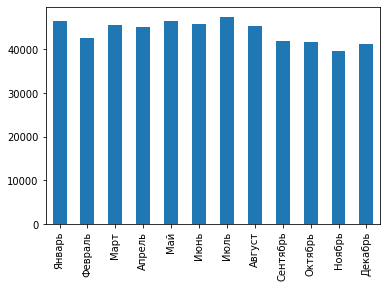

In [25]:
import datetime
import json
import requests
import pandas as pd


def getDateInCorrectFormat(date):
    # Приводим все даты к виду DD.MM.2020 (год рождения в нашей задаче не важен, берем високосный, 
    # чтобы не было проблем с 29 февралем)
    d = date.split('.')
    res = -1
    try:
        # Не знаю как это возможно (вопрос к VK), но может прийти 30 февраля. 
        # Жизнь к такому не готовила питона
        res = datetime.date(2020, int(d[1]), int(d[0]))
    finally:
        return res


def getDataFromGroup(group_id):
    # Токен надо вписать свой
    access_token = ''
    offset = 0
    result = {}
    
    # API отдает данные максимум по 1000 элементов, для сдвига используем параметр offset. 
    # Выполняем запросы пока не прийдет первый пустой
    while True:
        link = 'https://api.vk.com/method/groups.getMembers?group_id=' + group_id + '&access_token=' + access_token + '&v=5.9&fields=bdate&offset=' + str(offset)
        offset += 1000
        response = requests.get(link)
        if response.status_code != 200:
            print('Ошибка загрузки страницы, проверьте соединение: ' + str(response.status_code))
            return -1

        result_json = json.loads(response.text)        
        # Иногда может прилететь ошибка (при коде 200) - это внутренняя ошибка, например запрошены члены закрытой группы
        if 'error' in result_json:
            print('Ошибка получения данных группы: ' + result_json['error']['error_msg'])
            return -1
        if 'response' in result:
            print('Ошибка получения данных группы - в ответе отсутствует секция response ')
            return -1
        members_list = result_json['response']['items']
        if len(members_list) == 0:
            break

        # Есил у человека нормальная дата рождения, добавляем его в словарь, если нет пропускаем
        for member in members_list:
            if 'bdate' in member:
                parse_date = getDateInCorrectFormat(member['bdate'])
                if parse_date != -1:
                    result.setdefault(member['id'], parse_date)
    return result


if __name__ == '__main__':
    # Здесь меняем начальные данные
    load_from_vk = False    # грузить из VK или взять из сохраненного файла
    group_id = 'thelurk'    # наименование группы
    selection_size = 50     # размер случайной выборки людей
    selection_count = 10000 # количество циклов проверки

    # Если установлен флаг загрузки из VK то вызовыем процедуру и сохраним результат в CSV файл (дириктория блокнота)
    if load_from_vk:
        result = getDataFromGroup(group_id)
        if result == -1:
            exit(0)
        df = pd.DataFrame(result.items(), columns=['id', 'bdate'])
        df.to_csv('vk_data.csv')

    # Считываем данные из вновь сохраненного файла или старого
    df = pd.read_csv('vk_data.csv', parse_dates=['bdate'], dayfirst=True, index_col='bdate')

    # Добавим колонку с номером месяца (для рисования графика)
    df.loc[:, 'month'] = df.index.month

    # Рисуем гистограмму распределения количества ДР по месяцам года
    by_month = df.groupby('month').size()
    by_month.index = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
    by_month.plot(kind='bar')

    # Прогоняем тест на случайных выборках, расчитываем коэффициент
    more_then_one = 0
    for i in range(selection_count + 1):
        df_elements = df.sample(n=selection_size)
        by_date = df_elements.groupby('bdate').size()
        for s in by_date:
            if s > 1:
                more_then_one += 1
                break
    print('Процент успешных выборок: ' + str(100 * more_then_one / selection_count))
